In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [91]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

In [93]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [94]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


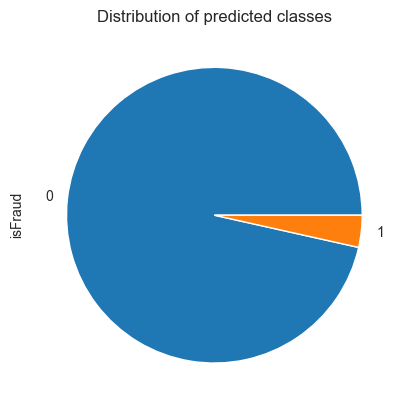

In [95]:
train.isFraud.value_counts().plot(kind='pie', title='Distribution of predicted classes');

In [96]:
len(train.columns)

434

In [54]:
# from tqdm import tqdm
#
# for column in tqdm(train.columns):
#     if train[train[column].isna() == True].shape[0] / len(train[column]) >= 0.7:
#         train = train.drop(columns=[column])

100%|██████████| 434/434 [09:13<00:00,  1.28s/it]


In [55]:
# len(train.columns)

226

In [97]:
def transform_email(value):
    """
    Transform email domains into domain names only.
    
    We have found in the data, that some email domains 
    are repeated (e.g. `gmail` and `gmail.com`). 
    
    :param value: .
    :return: transformed email domain.
    """
    if value is np.nan:
        return value
    return value.split('.')[0]

In [98]:
email_attributes = ['P_emaildomain', 'R_emaildomain']

for email_attribute in email_attributes:
    train[f'{email_attribute}_transformed'] = train[email_attribute].apply(lambda x: transform_email(x))

In [58]:
# !pip install preprocess


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [99]:
import sys
sys.path.append('..')

# Supress libraries deprecation import warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline


In [100]:
from os.path import join, dirname
import pandas as pd


def merge_datasets():
    """Merge `transactions.csv` and `identities.csv` files."""
    print('Datasets merging started.')

    dir_name = dirname(__file__)

    df_identities = pd.read_csv(join(dir_name, '../../data/identities.csv'))
    print('File identities.csv read.')

    df_transactions = pd.read_csv(
        join(dir_name, '../../data/transactions.csv')
    )
    print('File transactions.csv read.')

    df = pd.merge(
        df_transactions,
        df_identities,
        on='TransactionID',
        how='left'
    )

    print('Saving merged dataset...')
    df.to_csv(join(dir_name, '../../data/dataset.csv'), index=False)
    print('Dataset successfully stored as dataset.csv.')

In [101]:
# https://github.com/marrrcin/pandas-feature-union/blob/master/pandas_feature_union.py

import numpy as np
import pandas as pd

from joblib import Parallel, delayed
from sklearn.pipeline import FeatureUnion, _fit_transform_one, _transform_one
from scipy import sparse


class PandasFeatureUnion(FeatureUnion):
    """Feature union transformer for pandas."""

    def fit_transform(self, X, y=None, **fit_params):
        self._validate_transformers()
        result = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_transform_one)(
                transformer=trans,
                X=X,
                y=y,
                weight=weight,
                **fit_params)
            for name, trans, weight in self._iter())

        if not result:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

    def merge_dataframes_by_column(self, Xs):
        return pd.concat(Xs, axis="columns", copy=False)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(
                transformer=trans,
                X=X,
                y=None,
                weight=weight)
            for name, trans, weight in self._iter())
        if not Xs:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

In [102]:
import pandas as pd
import numpy as np

from sklearn.impute import MissingIndicator


class PandasMissingIndicator(MissingIndicator):
    """Missing indicator transformer for pandas."""

    def __init__(self, **kwargs):
        super().__init__(features='all', **kwargs)

        self._suffix = kwargs.get('suffix', '_missing')

    def fit(self, x, y=None):
        super().fit(x, y)
        return self

    def fit_transform(self, x, y=None):
        return self.fit(x).transform(x)

    def transform(self, x):
        assert isinstance(x, pd.DataFrame)

        matrix = super().transform(x)

        for index, col in enumerate(x.columns):
            row = matrix[:, index]
            col_name = col + self._suffix

            if np.any(row == True):
                x.loc[:, col_name] = row

                x[col_name] = x[col_name].astype(int)

        return x

In [103]:
import pandas as pd
import numpy as np

from sklearn.impute import MissingIndicator


class PandasMissingIndicator(MissingIndicator):
    """Missing indicator transformer for pandas."""

    def __init__(self, **kwargs):
        super().__init__(features='all', **kwargs)

        self._suffix = kwargs.get('suffix', '_missing')

    def fit(self, x, y=None):
        super().fit(x, y)
        return self

    def fit_transform(self, x, y=None):
        return self.fit(x).transform(x)

    def transform(self, x):
        assert isinstance(x, pd.DataFrame)

        matrix = super().transform(x)

        for index, col in enumerate(x.columns):
            row = matrix[:, index]
            col_name = col + self._suffix

            if np.any(row == True):
                x.loc[:, col_name] = row

                x[col_name] = x[col_name].astype(int)

        return x

In [104]:
import pandas as pd

from sklearn.impute import SimpleImputer


class PandasSimpleImputer(SimpleImputer):
    """Simple imputer transformer for pandas."""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit(self, x, y=None):
        return super().fit(x, y)

    def fit_transform(self, x, y=None):
        return self.fit(x).transform(x)

    def transform(self, x):
        assert isinstance(x, pd.DataFrame)

        matrix = super().transform(x)

        for index, col in enumerate(x.columns):
            if '_missing' in col:
                continue
            x.loc[:, col] = matrix[:, index]

        return x

In [105]:
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin


class PandasOneHotEncoder(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self

    def transform(self, df):
        assert isinstance(df, pd.DataFrame)

        columns = list(filter(lambda x: '_missing' not in x, df.columns))
        return pd.get_dummies(df, columns=columns)

In [106]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin


class SelectFeatures(BaseEstimator, TransformerMixin):
    """
    Select subset of features from dataframe.
    
    :param columns: columns to choose from dataframe.
    """

    def __init__(self, columns):
        self.columns = columns

    def fit(self, x, y=None):
        return self

    def transform(self, df):
        assert isinstance(df, pd.DataFrame)

        return df[self.columns]


class FilterColumnsByCountOfMissingValues(BaseEstimator, TransformerMixin):
    """
    Filter columns by count of missing values.
    
    :param threshold: threshold ratio of missing values in column.
    """

    def __init__(self, threshold, **kwargs):
        self.threshold = threshold

    def fit(self, x, y=None):
        return self

    def transform(self, df):
        assert isinstance(df, pd.DataFrame)

        to_drop = df.columns[1 - df.isnull().mean() < self.threshold].tolist()

        return df.drop(columns=to_drop)


class MergeSmallCategories(TransformerMixin):
    """
    Merge too small classes in categorical attribute into 'other' class.
    Taken from other author's project:
    https://github.com/pmacinec/diabetes-patients-readmissions-prediction/
    :param threshold: threshold of percentage frequency under which 
        classes will be merged into 'other' class.
    """

    def __init__(self, threshold=0.05, **kwargs):
        self.threshold = threshold
        self.mapping = {}

    def fit(self, df, y=None):
        for col in df.columns:
            if '_missing' in col:
                continue
            values = df[col].value_counts(normalize=True)
            for name, value in values.iteritems():
                if value < self.threshold:
                    self.mapping[name] = 'other'
        return self

    def transform(self, df, **transform_params):
        for col in df.columns:
            if '_missing' in col:
                continue
            df[col] = df[col].apply(
                lambda x: self.get_value(x)
            )
        return df

    def get_value(self, value):
        """
        Get value from mapping with handling special cases.
        :param value: value to be found in mapping.
        :return: mapped value or None, if value is unknown or NaN.
        """
        if pd.isna(value):
            return None
        if value not in self.mapping.keys():
            return value
        return self.mapping[value]


class EmailProviderTransform(TransformerMixin, BaseEstimator):
    """
    Transform email addresses into domains only.
    :param columns: columns containing email addresses.
    """

    def __init__(self, columns):
        self.columns = columns

    def fit(self, x, y=None):
        return self

    def transform(self, df, y=None, copy=None):
        def transform_email(value):
            """
            Transform email domains into domain names only.
            We have found in the data, that some email domains are
            repeated (e.g. `gmail` and `gmail.com`). Those domains
            should be aggregated into simply `gmail`.
            :param value: value to be transformed.
            :return: transformed email domain.
            """
            if value is np.nan:
                return value
            return value.split('.')[0]

        for col in self.columns:
            if col not in df.columns:
                continue
            df[col] = df[col].astype('str').apply(transform_email).astype('str')

        return df


class Normalizer(TransformerMixin):
    """Normalize numerical attributes of dataframe."""

    def __init__(self):
        self.means = {}
        self.stds = {}

    def fit(self, df, y=None):
        for col in df.columns:
            if '_missing' in col:
                continue
            self.means[col] = df[col].astype(float).mean()
            self.stds[col] = df[col].astype(float).std()
        return self

    def transform(self, df):
        for col in df.columns:
            if '_missing' in col:
                continue
            df[col] = (df[col] - self.means[col]) / self.stds[col]
        return df

In [107]:
categoric_features = train.select_dtypes(include=np.object).columns.to_list()
numeric_features = train.select_dtypes(exclude=np.object).columns.to_list()
label_feature = 'isFraud'

numeric_features.remove('TransactionID') # ID should not be used
numeric_features.remove(label_feature)

pipeline = PandasFeatureUnion([
    ('numeric_features', make_pipeline(
        SelectFeatures(numeric_features),
        FilterColumnsByCountOfMissingValues(0.5),
        PandasMissingIndicator(),
        PandasSimpleImputer(strategy='mean'),
        Normalizer()
    )),
    ('categoric_features', make_pipeline(
        SelectFeatures(categoric_features),
        FilterColumnsByCountOfMissingValues(0.5),
        EmailProviderTransform(['P_emaildomain', 'R_emaildomain']),
        PandasMissingIndicator(),
        PandasSimpleImputer(strategy='most_frequent'),
        MergeSmallCategories(),
        PandasOneHotEncoder()
    )),
    ('label_feature', make_pipeline(
        SelectFeatures([label_feature])
    ))
])

In [108]:
%%time
train = pipeline.fit_transform(train)

CPU times: user 1min 8s, sys: 1min 18s, total: 2min 27s
Wall time: 2min 46s


In [109]:
from NiaPy.benchmarks import Benchmark


class ClassificationBenchmark(Benchmark):
    """
    NiaPy benchmark for classification task.

    :param model_fn: function which returns sklearn model.
    :param eval_fn: function(y_test, y_pred) which evaluates predictions
         and returns a scalar.
    :param x_train: train data.
    :param y_train: train labels.
    :param x_test: test data.
    :param y_test: test labels.
    """
    def __init__(self, model_fn, eval_fn, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.model_fn = model_fn
        self.eval_fn = eval_fn

        Benchmark.__init__(self, 0, 1)

    def get_length(self):
        """
        Get length of the vector which is being optimized.

        :return: length of the vector which is being optimized.
        """
        return len(self.x_train.columns)

    def select_columns(self, solution_vec):
        """
        Select columns based on the solution vector.

        :param solution_vec: solution of the problem as a vector.
        :return: list of column names based on the solution vector.
        """
        return self.x_train.columns[solution_vec >= 0.5].tolist()

    def function(self):
        def evaluate(_, solution_vec):
            selected_columns = self.select_columns(solution_vec)

            # fix of incorrect serialization when using multi threading module
            if len(selected_columns) == 1 and \
                    not isinstance(selected_columns[0], str):
                selected_columns = selected_columns[0]

            if len(selected_columns) < 1:
                # inverted score, since the optimizer minimizes the task
                return 1 - 0

            clf = self.model_fn()
            clf = clf.fit(self.x_train[selected_columns], self.y_train)

            y_pred = clf.predict(self.x_test[selected_columns])
            score = self.eval_fn(self.y_test, y_pred)

            # inverted score, since the optimizer minimizes the task
            return 1 - score

        return evaluate

In [110]:
import sys
sys.path.append('..')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier

from NiaPy.task import StoppingTask, OptimizationType
from NiaPy.algorithms.basic import GreyWolfOptimizer, FireflyAlgorithm, GeneticAlgorithm, \
    BatAlgorithm, ParticleSwarmOptimization
from tqdm import tqdm

In [111]:
def optimize(benchmark, algorithm, nGEN, num_runs = 5):
    """
    Optimize task with provided algorithm.
    
    :param benchmark: NiaPy.Benchmark to optimize.
    :param algorithm: algorithm object to use for optimization task.
    :param nGEN: number of generations.
    :param num_runs: number of algorithm runs (defaults to 5).
    """
    best_columns = None
    best_score = 0

    for i in tqdm(range(num_runs)):
        # when using OptimizationType.MAXIMIZATION, the library will fail
        # we use OptimizationType.MINIMIZATION instead and invert the score
        task = StoppingTask(
            D=benchmark.get_length(),
            nGEN=nGEN,
            optType=OptimizationType.MINIMIZATION,
            benchmark=benchmark
        )

        solution_vec, score = algorithm.run(task=task)
        # invert the score
        score = 1 - score
        columns = benchmark.select_columns(solution_vec)

        print('--------------')
        print(f'Run {i + 1}')
        print('--------------')
        print(f'Score: {score}')
        print(f'Number of features selected: {len(columns)}\n')
        print('\n')

        if score > best_score:
            best_score = score
            best_columns = columns

    print(f'\nBest score of {num_runs} runs: {best_score}')
    print(f'Number of features selected: {len(best_columns)}')

    return best_columns

In [112]:
train.dtypes

TransactionDT                        float64
TransactionAmt                       float64
card1                                float64
card2                                float64
card3                                float64
                                      ...   
P_emaildomain_transformed_gmail        uint8
P_emaildomain_transformed_hotmail      uint8
P_emaildomain_transformed_other        uint8
P_emaildomain_transformed_yahoo        uint8
isFraud                                int64
Length: 443, dtype: object

In [73]:
# object_columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4',
#                   'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28',
#                   'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
#                   'DeviceType', 'DeviceInfo', 'P_emaildomain_transformed', 'R_emaildomain_transformed']
#
# train = pd.get_dummies(train,
#                        prefix=object_columns,
#                        columns=object_columns,
#                        drop_first=True)

In [74]:
# train = train.fillna()

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['isFraud']), 
                                                     train['isFraud'],
                                                     train_size=0.2,
                                                     test_size=0.04)

In [76]:
X_train

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,M1_other,M2_T,M2_other,M3_T,M3_other,M4_M0,M4_M1,M4_M2,M6_T,M6_other
7277,-1.545347,-0.497006,-1.136409,-0.795398,2.809285,-2.367145,-5.926491e-16,0.0000,-0.083047,-0.079329,...,0,1,0,1,0,0,0,1,0,1
401273,0.593345,-0.315840,0.755588,1.228930,-0.282202,0.650220,-1.383882e+00,0.0786,-0.090533,-0.092260,...,0,1,0,1,0,1,0,0,0,1
233509,-0.400245,1.442211,-1.447763,-1.676651,-0.282202,0.650220,-1.112806e+00,0.0786,-0.098020,-0.092260,...,0,1,0,1,0,1,0,0,1,0
54442,-1.320137,0.104209,0.032291,-0.878414,-0.282202,0.601553,2.529993e-01,0.0786,-0.098020,-0.092260,...,0,1,0,1,0,1,0,0,1,0
256047,-0.269470,1.751833,-0.972775,-1.606406,-0.282202,-2.367145,2.025418e+00,0.0786,-0.090533,-0.092260,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207757,-0.557567,-0.113217,-1.616907,-1.606406,-0.282202,0.650220,-1.112806e+00,0.0786,-0.090533,-0.079329,...,0,1,0,0,1,1,0,0,1,0
579650,1.749642,-0.113217,-1.684646,-0.852871,-0.282202,0.650220,2.025418e+00,0.0786,0.703064,0.606006,...,0,1,0,1,0,1,0,0,0,1
417069,0.684281,-0.217330,1.054292,-1.229638,-0.282202,-2.367145,-9.042859e-01,0.0786,-0.060586,-0.072864,...,0,1,0,1,0,1,0,0,1,0
249099,-0.310159,0.969729,1.054292,-1.229638,-0.282202,-2.367145,-9.042859e-01,0.0786,-0.098020,-0.092260,...,0,1,0,1,0,1,0,0,1,0


In [77]:
y_train

7277      0
401273    0
233509    0
54442     0
256047    0
         ..
207757    0
579650    0
417069    0
249099    0
145267    0
Name: isFraud, Length: 118108, dtype: int64

In [118]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


def random_undersample(x, y):
    """
    Undersample data by random choosing samples from majority class.
    :param x: train data features.
    :param y: train data labels.
    :return: x, y after undersampling.
    """
    rus = RandomUnderSampler(random_state=42)
    return rus.fit_resample(x, y)

In [119]:
X_train, y_train = random_undersample(X_train, y_train)

In [80]:
def model_fn():
    return DecisionTreeClassifier(random_state=42)

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
benchmark = ClassificationBenchmark(model_fn,
                                    accuracy_score,
                                    X_train,
                                    y_train,
                                    X_val,
                                    y_val)

In [87]:
%%time

columns = optimize(benchmark, FireflyAlgorithm(), 100)

 20%|██        | 1/5 [09:14<36:59, 554.92s/it]

--------------
Run 1
--------------
Score: 0.7802895605791211
Number of features selected: 210





 40%|████      | 2/5 [18:37<27:58, 559.50s/it]

--------------
Run 2
--------------
Score: 0.7745322157310981
Number of features selected: 223





 60%|██████    | 3/5 [27:32<18:16, 548.32s/it]

--------------
Run 3
--------------
Score: 0.7821522309711286
Number of features selected: 196





 80%|████████  | 4/5 [36:29<09:03, 543.75s/it]

--------------
Run 4
--------------
Score: 0.780501227669122
Number of features selected: 202





100%|██████████| 5/5 [45:44<00:00, 548.93s/it]

--------------
Run 5
--------------
Score: 0.7755482177631022
Number of features selected: 235




Best score of 5 runs: 0.7821522309711286
Number of features selected: 196
CPU times: user 38min 51s, sys: 6min 19s, total: 45min 10s
Wall time: 45min 44s


In [121]:
from xgboost import XGBRFClassifier

clf = XGBRFClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
f1_score(y_val, y_pred)

0.23181304183942705

In [123]:
len(columns)

196